In [1]:
from IPython.display import Math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# 경고 메시지 출력 표기 생략
warnings.filterwarnings('ignore')

# 시각화 차트 사이즈 설정
plt.rcParams['figure.figsize'] = (12, 7)

## Logistic Regression

* 선형 회귀 방식을 이용한 이진 분류 알고리즘
* 분류 레이블 : 0 or 1
* 0~1 범위를 예측 결과로 갖는 모델 필요
    * 가설 결과에 Sigmoid 함수 적용
* Logistic, sigmoid 함수
    * S자 모양의 함수

$\displaystyle s(z) = \frac{1}{1+e^{-z}}$

$z$ 값을 0과 1사이의 값으로 바꾸는 함수

**Sigmoid 함수 원리**

$\frac{1}{1} = 1$인데, 분모 1에다 0보다 크거나 같은 어떤 수를 더 하면 그 결과는 1 보다 클수 없다.

분모에 더 할 값은 $e^{-z}$, 이 값은 어떤 $z$가 주어져도 0보다 작아 지지 않는다.

$e^{-z}$는 $z$의 값이 크면 클 수록 0에 가까운 작은 수가 되고 $z$값이 작으면 무한대에 가까운 큰 수가 된다

따라서 $z$의 값이 크면 $e^{-z}$의 값이 작아져서 $\frac{1}{1+e^{-z}}$의 값은 1에 가까워 지고 그 반대는 0에 가까워 진다.

* sklearn API
    * `sklearn.linear_model.LogisticRegression`


## Sigmoid 함수 그리기

$\Large sigmoid(z) = \frac{1}{1+e^{-z}}$

`sigmoid(z)` 함수를 정의한 후 sigmoid 함수를 구현해 주세요

hint. `np.exp()`를 활용합니다.

In [2]:
# 코드를 입력해 주세요
def sigmoid(z):
    return  1 / (1+np.exp(-z))

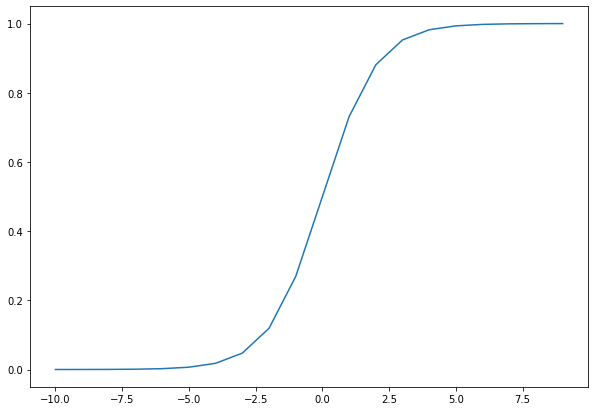

In [3]:
# 코드검증
plt.figure(figsize=(10, 7))

x = np.arange(-10, 10)
y = sigmoid(x)

plt.plot(x, y)
plt.show()

## 로지스틱 회귀 실습: 위스콘신 유방암 환자

In [4]:
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_breast_cancer

`load_breast_cancer()` 를 로드하여 `cancer`변수에 대입합니다.

In [5]:
# 코드를 입력해 주세요
cancer = load_breast_cancer()

`df` 변수를 만들어 데이터프레임을 생성합니다.

In [6]:
# 코드를 입력해 주세요
df = pd.DataFrame(cancer['data'], columns=cancer['feature_names'])
df['target'] = cancer['target']
df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


`scaler` 변수에 표준화(StandardScaler)를 생성하고 `target` 컬럼을 제외한 X 변수에 대한 표준화를 진행합니다.

In [7]:
# 코드를 입력해 주세요
scaler = StandardScaler()
scaled = scaler.fit_transform(df.drop('target', axis=1))

- 데이터셋을 분할합니다
- `random_state=10`으로 설정
- stratify 지정

In [8]:
# 코드를 입력해 주세요
x_train, x_test, y_train, y_test = train_test_split(scaled, df['target'], stratify=df['target'], random_state=10)

`LogisticRegression`을 학습한 뒤 예측까지 진행합니다.

In [9]:
# 코드를 입력해 주세요
lr_clf = LogisticRegression()
lr_clf.fit(x_train, y_train)
pred = lr_clf.predict(x_test)

`정확도(accuracy)`를 측정합니다.

In [10]:
# 코드를 입력해 주세요
accuracy_score(y_test, pred)

0.972027972027972

## 오차 행렬 (Confusion Matrix)

In [11]:
from sklearn.metrics import confusion_matrix
from IPython.display import Image

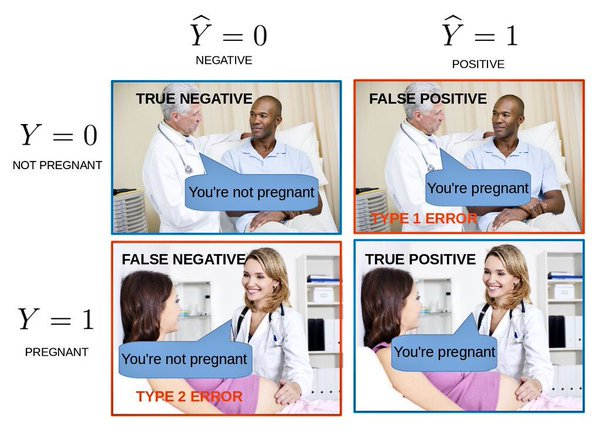

In [12]:
Image('https://skappal7.files.wordpress.com/2018/08/confusion-matrix.jpg', width=700)

In [13]:
cm = confusion_matrix(y_test, pred)

In [14]:
cm

array([[51,  2],
       [ 2, 88]])

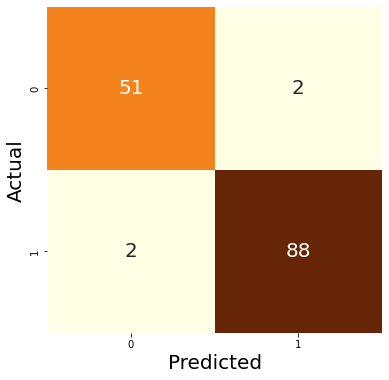

In [15]:
fig, ax = plt.subplots()
fig.set_size_inches(6, 6)
sns.heatmap(cm, annot=True, annot_kws={"size": 20}, cmap='YlOrBr', cbar=False, ax=ax)
plt.xlabel('Predicted', fontsize=20)
plt.ylabel('Actual', fontsize=20)
plt.show()

In [16]:
TN, FP, FN, TP = cm.ravel()

In [17]:
TN, FP, FN, TP

(51, 2, 2, 88)

## 정밀도 (Precision)

Positive로 예측한 전체 건수에서 옳게 예측한 건수의 비율

- 중요 사례: 스팸 분류 (스팸으로 분류한 메일 중에서 중요 메일이 있는 경우

In [18]:
tn, fp, fn, tp = confusion_matrix([0, 1, 0, 1], [1, 1, 1, 0]).ravel()

In [19]:
precision = TP / (FP + TP)

In [20]:
precision

0.9777777777777777

In [21]:
from sklearn.metrics import precision_score

In [22]:
precision_score(y_test, pred)

0.9777777777777777

## 재현율 (Recall), 민감도

실제 Positive인 전체 건수에서 옳게 예측한 건수의 비율
- 중요 사례: 암 진단 (암 환자를 건강으로 분류하는 경우)
- TPR (True Positive Rate)

In [23]:
recall = TP / (FN + TP)

In [24]:
recall

0.9777777777777777

In [25]:
from sklearn.metrics import recall_score

In [26]:
recall_score(y_test, pred)

0.9777777777777777

## F1 Score

재현율과 정밀도의 균형을 나타내는 수치

${F1 Score}=2*\: \frac{precision\:*\: recall}{precision+recall}$



In [27]:
2 * (precision * recall) / (precision + recall)

0.9777777777777777

In [28]:
from sklearn.metrics import f1_score

In [29]:
f1_score(y_test, pred)

0.9777777777777777